In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
file_path = "Dataset .csv"
dataset = pd.read_csv(file_path)

In [15]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Level 2

# Task 1: Table Booking and Online Delivery

# Determine the percentage of restaurants that offer table booking and online delivery.

In [19]:
table_booking_percent = (dataset["Has Table booking"].value_counts(normalize=True) * 100)
online_delivery_percent = (dataset["Has Online delivery"].value_counts(normalize=True) * 100)

In [20]:
print("\nPercentage of Restaurants with Table Booking:\n", table_booking_percent)
print("\nPercentage of Restaurants with Online Delivery:\n", online_delivery_percent)


Percentage of Restaurants with Table Booking:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of Restaurants with Online Delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


# Compare the average ratings of restaurants with table booking and those without.

In [22]:
avg_rating_table_booking = dataset.groupby("Has Table booking")["Aggregate rating"].mean()
print("\nAverage Ratings with/without Table Booking:\n", avg_rating_table_booking)


Average Ratings with/without Table Booking:
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


# Analyze the availability of online delivery among restaurants with different price ranges.

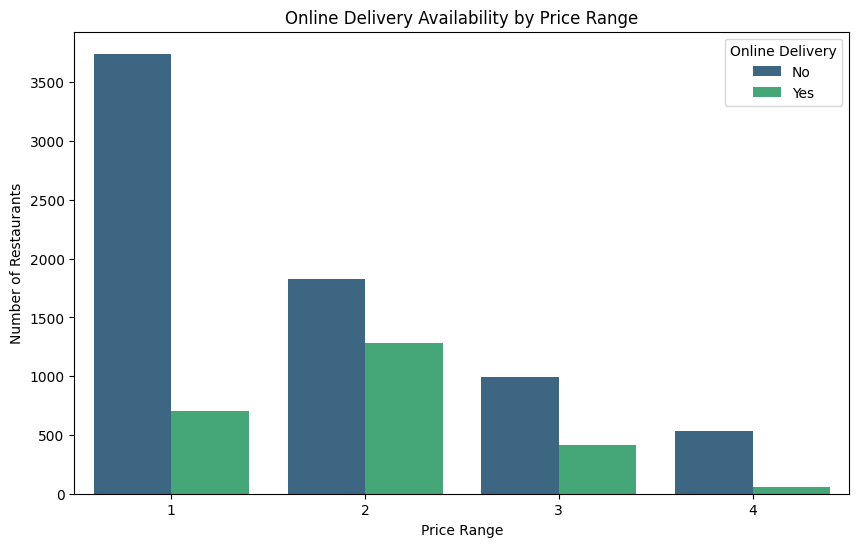

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="Price range", hue="Has Online delivery", palette="viridis")
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.legend(title="Online Delivery")
plt.show()

# Task 2: Price Range Analysis

#  the most common price range among all the restaurants.

In [27]:
# Most Common Price Range
most_common_price = dataset["Price range"].mode()[0]
print("\nMost Common Price Range:", most_common_price)


Most Common Price Range: 1


# average rating for each price range.

In [29]:
avg_rating_price = dataset.groupby("Price range")["Aggregate rating"].mean()
print("\nAverage Rating by Price Range:\n", avg_rating_price)


Average Rating by Price Range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


# the color that represents the highest average rating among different price ranges.

In [31]:
max_rating_price = avg_rating_price.idxmax()
print("\nPrice Range with Highest Average Rating:", max_rating_price)


Price Range with Highest Average Rating: 4


# Task 3: Feature Engineering

# additional features from the existing columns, such as the length of the restaurant name or address.

In [34]:
# Length of Restaurant Name and Address
dataset['Name Length'] = dataset['Restaurant Name'].apply(len)
dataset['Address Length'] = dataset['Address'].apply(len)

In [35]:
dataset['Name Length']

0       16
1       16
2       22
3        4
4       11
        ..
9546    11
9547    12
9548     5
9549    11
9550    24
Name: Name Length, Length: 9551, dtype: int64

In [36]:
dataset['Address Length']

0        71
1        67
2        56
3        70
4        64
       ... 
9546    103
9547     77
9548     73
9549     75
9550     65
Name: Address Length, Length: 9551, dtype: int64

# new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [38]:
# Encoding 'Has Table booking' and 'Has Online delivery'
dataset['Has Table Booking Encoded'] = dataset['Has Table booking'].map({'Yes': 1, 'No': 0})
dataset['Has Online Delivery Encoded'] = dataset['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [39]:
print("\nNew Features Head:\n", dataset[['Name Length', 'Address Length', 'Has Table Booking Encoded', 'Has Online Delivery Encoded']].head())


New Features Head:
    Name Length  Address Length  Has Table Booking Encoded  \
0           16              71                          1   
1           16              67                          1   
2           22              56                          1   
3            4              70                          0   
4           11              64                          1   

   Has Online Delivery Encoded  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
